In [12]:
from __future__ import division
import pandas as  pd
import numpy as np

In [13]:
path='/media/machine_learning/A80C461E0C45E7C01/dogs'

In [14]:
import os

In [69]:
train=pd.read_csv(os.path.join(path,'newTr.csv'),dtype='float64')

In [70]:
test=pd.read_csv(os.path.join(path,'newTs.csv'),dtype='float64')

In [71]:
tempTrain=train
tempTest=test

In [72]:
train=train.drop('interest_level',axis=1)
print(train.shape)
print(test.shape)

(49352, 52)
(74659, 52)


In [42]:
set(train.columns)-set(test.columns)

set()

In [73]:
trainvec=np.array(train)
testvec=np.array(test)

In [85]:

data=pd.concat((train,test),axis=0)
print(data.shape)
print(type(data))

(124011, 52)
<class 'pandas.core.frame.DataFrame'>


In [86]:
good_features=['Month','Day','Wday','hour','features_count','photos_count','bathrooms_cat','bedroom_cat']
print(len(good_features))

8


In [88]:

data=data[[col  for  col in data.columns if col in good_features]]
data.head(3)

,Month,Day,Wday,hour,features_count,photos_count,bathrooms_cat,bedroom_cat
0,6.0,24.0,4.0,7.0,0.0,5.0,2.0,3.0
1,6.0,12.0,6.0,12.0,5.0,11.0,1.0,2.0
2,4.0,17.0,6.0,3.0,4.0,8.0,1.0,1.0


In [90]:
data=data.astype(int)
data.head()


,Month,Day,Wday,hour,features_count,photos_count,bathrooms_cat,bedroom_cat
0,6,24,4,7,0,5,2,3
1,6,12,6,12,5,11,1,2
2,4,17,6,3,4,8,1,1
3,4,18,0,2,2,3,1,1
4,4,28,3,1,1,3,1,4


In [91]:
data=np.array(data)

In [92]:

################################Compute kinetic  correlation matrix#########################################
#https://alexandrudaia.quora.com/Onicescu-correlation-coefficient-Python-version-my-approach


In [93]:
import numpy as np
import pandas   as pd
 
import  numpy as np
def  kin_energy(random_vec):
    """return    kinetic  energy  of   random vector represented   of   (1,) dimmensional  array"""
    freq=np.unique(random_vec,return_counts=True)
    prob=freq[1]/random_vec.shape[0]
    energy=np.sum(prob**2)
    return  energy
def  ic(vector1,vector2):
    """return  information  coefficient   IC  for  2  random  variables 
    -defined as   dot product of   probabilities  corresponding to  each class
    
    """
    a=vector1
    b=vector2
    # get the probs  in order  to    do     dot product with  them 
    prob1=np.unique(a,return_counts=True)[1]/a.shape[0]
    prob2=np.unique(b,return_counts=True)[1]/b.shape[0]
    p1=list(prob1)
    p2=list(prob2)
    diff=len(p1)-len(p2)
    if diff>0:
        for elem in range(diff):
            p2.append(0)
    if diff<0:
        for  elem in range((diff*-1)):
            p1.append(0)
    ic=np.dot(np.array(p1),np.array(p2))
    return ic
    
 
def  o(vector1,vector2):
    """return onicescu   information   correlation   based on kinetic energy """
    i_c=ic(vector1,vector2)
    o=i_c/np.sqrt(kin_energy(vector1)*kin_energy(vector2))
    return o


# In[162]:

rows=data.shape[1]
rows


8

In [94]:
matrix= np.zeros((rows,rows))


# In[164]:


for i in range(rows):
   for j in  range(i, rows):
       cor=o(data[:,i],data[:,j])
 
       matrix[i,j]=cor
       matrix[j,i]=cor
        


# In[165]:

corr_matrix=matrix
matrix=pd.DataFrame(matrix)
matrix

,0,1,2,3,4,5,6,7
0,1.000000,0.276730,0.657875,0.528257,0.519585,0.216882,0.555646,0.931039
1,0.276730,1.000000,0.466671,0.519248,0.647921,0.551989,0.235585,0.338890
2,0.657875,0.466671,1.000000,0.949702,0.884528,0.719075,0.504999,0.809803
3,0.528257,0.519248,0.949702,1.000000,0.867558,0.700078,0.407388,0.712993
4,0.519585,0.647921,0.884528,0.867558,1.000000,0.868042,0.383121,0.665409
5,0.216882,0.551989,0.719075,0.700078,0.868042,1.000000,0.180681,0.303454
6,0.555646,0.235585,0.504999,0.407388,0.383121,0.180681,1.000000,0.640445
7,0.931039,0.338890,0.809803,0.712993,0.665409,0.303454,0.640445,1.000000


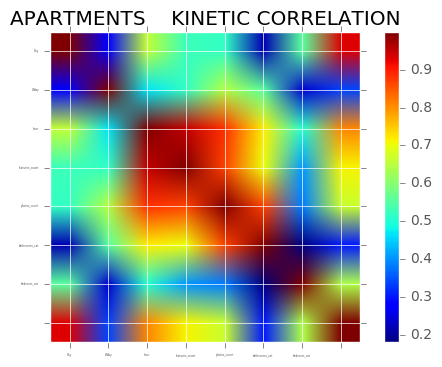

In [96]:
matrix.columns=good_features



# In[167]:

import  string
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt


# In[168]:

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


# In[169]:


names=good_features
def correlation_matrix(matrix,names):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet',10)
    cax = ax1.imshow(matrix)
    ax1.grid(True)
    plt.title('APARTMENTS    KINETIC CORRELATION')
    labels= names
    ax1.set_xticklabels(labels,fontsize=2)
    ax1.set_yticklabels(labels,fontsize=2)
 
    cbar = fig.colorbar(cax, ticks=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16,.17,.18])
    plt.show()

correlation_matrix(matrix,names)


In [97]:
class kineticPCA(object):
    def __init__(self,kinetic_components):
        self.kinetic_components=kinetic_components
        self.eigenvalues=None
        self.eigenvectors=None
    def fit_transform_Kinetic(self,matrix,data):
        self.eigenvalues,self.eigenvectors=np.linalg.eig(matrix)
        ordered=np.argsort(self.eigenvalues)
        components=self.eigenvectors[:,ordered[-self.kinetic_components:]]
        return data.dot(components)
        
        
        


# In[172]:

kPCA=kineticPCA(2)


# In[173]:

new_features=kPCA.fit_transform_Kinetic(corr_matrix,data)


In [100]:

tempTrain['kineticPCA1']=new_features[0:49352,0]
tempTrain['kineticPCA2']=new_features[0:49352,1]
 
print(tempTrain.shape)
tempTrain.head()

(49352, 55)


,building_id,latitude,longitude,manager_id,Year,Month,Day,Wday,Yday,hour,...,energy1,energy2,energy3,sum_manager_id,sum_building_id,kinetic_building_id,kinetic_manager_id,distance_city,kineticPCA1,kineticPCA2
0,3797.0,40.7145,-73.9425,1568.0,2016.0,6.0,24.0,4.0,176.0,7.0,...,0.5,0.654321,0.802469,996467.0,10854.0,0.150000,0.135000,0.075153,-6.772096,-16.238018
1,8986.0,40.7947,-73.9667,1988.0,2016.0,6.0,12.0,6.0,164.0,12.0,...,0.5,0.654321,0.654321,7562996.0,208106.0,0.119114,0.158400,0.009739,-8.406912,-19.160424
2,8889.0,40.7388,-74.0018,3733.0,2016.0,4.0,17.0,6.0,108.0,3.0,...,1.0,1.000000,1.000000,55355.0,48410.0,0.183391,0.111531,0.057150,-8.559685,-14.502181
3,1848.0,40.7539,-73.9677,282.0,2016.0,4.0,18.0,0.0,109.0,2.0,...,1.0,1.000000,1.000000,829223.0,8027968.0,0.154321,0.126400,0.031196,-5.675455,-9.416877
4,0.0,40.8241,-73.9493,2618.0,2016.0,4.0,28.0,3.0,119.0,1.0,...,0.5,1.000000,0.506173,17479.0,0.0,1.000000,0.142857,0.043384,-7.575550,-13.724906


In [101]:

tempTest['kineticPCA1']=new_features[49352:,0]
tempTest['kineticPCA2']=new_features[49352:,1]
 
print(tempTest.shape)

(74659, 54)


In [106]:
tempTrain.to_csv(os.path.join(path,'kineticTrainGOOD.csv'),index=False)

In [108]:
tempTest.to_csv(os.path.join(path,'kineticTestGOOD.csv'),index=False)

In [107]:
tempTrain

,building_id,latitude,longitude,manager_id,Year,Month,Day,Wday,Yday,hour,...,energy1,energy2,energy3,sum_manager_id,sum_building_id,kinetic_building_id,kinetic_manager_id,distance_city,kineticPCA1,kineticPCA2
0,3797.0,40.7145,-73.9425,1568.0,2016.0,6.0,24.0,4.0,176.0,7.0,...,0.5,0.654321,0.802469,9.964670e+05,1.085400e+04,0.150000,0.135000,0.075153,-6.772096,-16.238018
1,8986.0,40.7947,-73.9667,1988.0,2016.0,6.0,12.0,6.0,164.0,12.0,...,0.5,0.654321,0.654321,7.562996e+06,2.081060e+05,0.119114,0.158400,0.009739,-8.406912,-19.160424
2,8889.0,40.7388,-74.0018,3733.0,2016.0,4.0,17.0,6.0,108.0,3.0,...,1.0,1.000000,1.000000,5.535500e+04,4.841000e+04,0.183391,0.111531,0.057150,-8.559685,-14.502181
3,1848.0,40.7539,-73.9677,282.0,2016.0,4.0,18.0,0.0,109.0,2.0,...,1.0,1.000000,1.000000,8.292230e+05,8.027968e+06,0.154321,0.126400,0.031196,-5.675455,-9.416877
4,0.0,40.8241,-73.9493,2618.0,2016.0,4.0,28.0,3.0,119.0,1.0,...,0.5,1.000000,0.506173,1.747900e+04,0.000000e+00,1.000000,0.142857,0.043384,-7.575550,-13.724906
5,2544.0,40.7429,-74.0028,3081.0,2016.0,4.0,19.0,1.0,110.0,4.0,...,0.5,0.555556,1.000000,3.237600e+04,1.155900e+04,0.142857,0.111570,0.054510,-3.853111,-12.908856
6,2711.0,40.8012,-73.9660,12.0,2016.0,4.0,27.0,2.0,118.0,3.0,...,0.5,0.654321,0.654321,1.344611e+06,9.349800e+04,0.141869,0.128472,0.016270,-13.466265,-18.186037
7,169.0,40.7427,-73.9957,3959.0,2016.0,4.0,13.0,2.0,104.0,6.0,...,0.5,0.802469,1.000000,7.342232e+06,1.323451e+06,0.125000,0.137996,0.050483,-5.281011,-14.650914
8,7635.0,40.8234,-73.9457,3339.0,2016.0,4.0,20.0,2.0,111.0,2.0,...,1.0,0.654321,0.654321,6.599426e+06,6.767700e+04,0.129630,0.135000,0.044471,-7.886813,-12.265342
9,0.0,40.7278,-73.9808,633.0,2016.0,4.0,2.0,5.0,93.0,2.0,...,0.5,1.000000,0.654321,1.169150e+05,0.000000e+00,1.000000,0.145558,0.058642,-0.369234,-11.266153


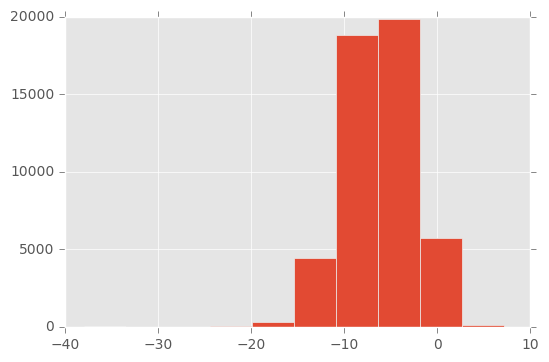

In [105]:
plt.hist(tempTrain['kineticPCA1'])
plt.show()